In [1]:
import numpy as np
import os
import time
import yaml
from sompz import CellMap

import matplotlib.pyplot as plt
%matplotlib inline

data_dir_cfg = '/global/homes/j/jmyles/repositories/des-science-sompz-buchs-et-al/test/full_run_on_data/cfg/'

In [2]:
t0 = time.time()
for i in range(100):
    
    data_dir = '/project/projectdirs/des/jmyles/v0.27_{:03d}/'.format(i)
    outfile = data_dir + 'pzchat.npy'
    if os.path.exists(outfile):
        print('{:03d} {} already exists'.format(i, outfile))
        continue
    
    # same between all realizations but will iterate for generalization
    cfg = yaml.load(open(data_dir_cfg + 'buzzard_v0.27_{:03d}_of_300.cfg'.format(i),'r'))

    fullpz = ["Z{:.2f}".format(s).replace(".","_") for s in np.arange(0,6.01,0.01)] # stays hardcoded while we use Laigle catalog as only truth
    pointz = 'Z'

    if cfg['usepz']:
        key = fullpz
        keylabel = 'fullpz'
    else:
        key = pointz
        keylabel = 'pointz'
    if cfg['bin_on_mode']:
        keylabel = 'modal_even'

    cm = CellMap.read(data_dir + 'data_cellmap_10e6.h5')
    cm.pcchat = np.load(data_dir + cfg['pcchat_filename'])
    zbins = np.arange(0,cfg['zbins_max']+cfg['zbins_dz']/2.,cfg['zbins_dz'])
    
    all_wide_cells = np.arange(cm._number_wide_cells)
    pz_chat = np.array(cm.histogram(key, all_wide_cells, cell_weights=np.ones(len(all_wide_cells)), bins=zbins, individual_chat=True))
    print("{:03d} write {} {:.2f} {} {}".format(i, outfile, time.time() - t0, pz_chat.shape, np.sum(pz_chat)))
    np.save(outfile, pz_chat)

Illegal slicing argument for scalar dataspace
just putting None
22.5
<type 'numpy.float64'>
000 write /project/projectdirs/des/jmyles/v0.27_000/pzchat.npy 10.31 (1024, 600) 102400.0
001 /project/projectdirs/des/jmyles/v0.27_001/pzchat.npy already exists
002 /project/projectdirs/des/jmyles/v0.27_002/pzchat.npy already exists
003 /project/projectdirs/des/jmyles/v0.27_003/pzchat.npy already exists
Illegal slicing argument for scalar dataspace
just putting None
22.5
<type 'numpy.float64'>
004 write /project/projectdirs/des/jmyles/v0.27_004/pzchat.npy 20.71 (1024, 600) 102400.0
Illegal slicing argument for scalar dataspace
just putting None
22.5
<type 'numpy.float64'>
005 write /project/projectdirs/des/jmyles/v0.27_005/pzchat.npy 30.48 (1024, 600) 102400.0
Illegal slicing argument for scalar dataspace
just putting None
22.5
<type 'numpy.float64'>
006 write /project/projectdirs/des/jmyles/v0.27_006/pzchat.npy 40.49 (1024, 600) 102400.0
Illegal slicing argument for scalar dataspace
just putti

Text(0,0.5,'$p(z)$')

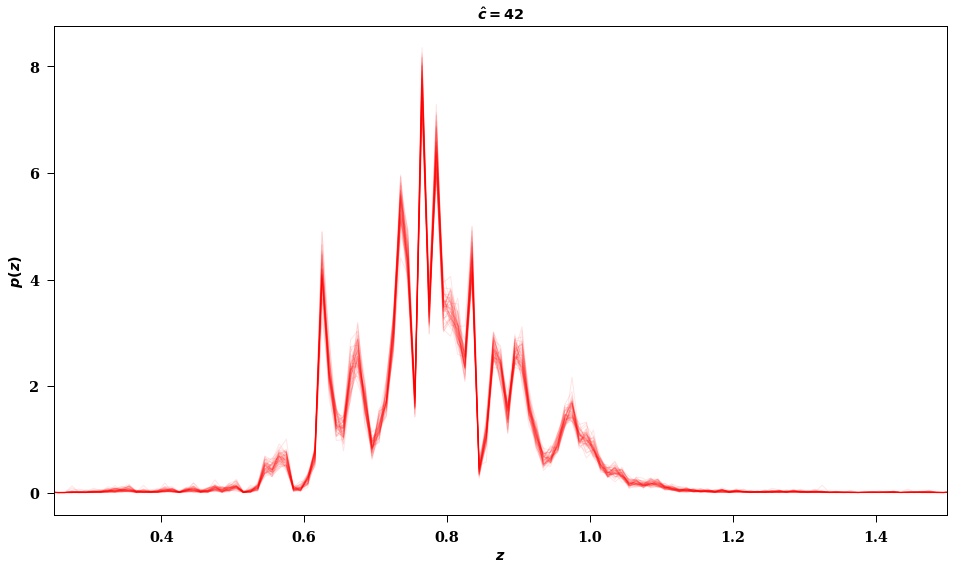

In [18]:
plt.figure(figsize=(16,9))
chat = 42
for i in range(50):
    data_dir = '/project/projectdirs/des/jmyles/v0.27_{:03d}/'.format(i)
    infile = data_dir + 'pzchat.npy'
    pzchat = np.load(infile)
    plt.plot((zbins[1:] + zbins[:-1]) / 2., pzchat[chat,:], color='r', alpha=0.1)
plt.xlim((0.25,1.5))
plt.title(r'$\hat{{c}}={}$'.format(chat))
plt.xlabel(r'$z$')
plt.ylabel(r'$p(z)$')